In [1]:
import pandas as pd

GAfile_path = '../0-data/1-GA/3-SS-max/meanall.csv'
PSOfile_path = '../0-data/2-PSO/3-SS-max/meanall.csv'
SAfile_path = '../0-data/3-SA/3-SS-max/meanall.csv'
BOfile_path = '../0-data/4-BO/3-SS-max/mean.log'
MCTSfile_path = '../0-data/5-MCTS/3-SS-max/mean.log'
ROfile_path = '../0-data/6-RO/3-SS-max/mean.log'

GAdata = pd.read_csv(GAfile_path, usecols=lambda x: x != 'Unnamed: 0')
PSOdata = pd.read_csv(PSOfile_path, usecols=lambda x: x != 'Unnamed: 0')
SAdata = pd.read_csv(SAfile_path, usecols=lambda x: x != 'Unnamed: 0')

GA_means = GAdata.mean().tolist()
PSO_means = PSOdata.mean().tolist()
SA_means = SAdata.mean().tolist()

BOITC_limitvalue_mean_list = []
with open(BOfile_path, 'r') as resultlog:
    resultlog_lines = resultlog.readlines()

for index, line in enumerate(resultlog_lines):
    BOITC_limitvalue_mean_list.append(float(line.split()[-1]))
    
MCTSITC_limitvalue_mean_list = []
with open(MCTSfile_path, 'r') as resultlog:
    resultlog_lines = resultlog.readlines()

for index, line in enumerate(resultlog_lines):
    MCTSITC_limitvalue_mean_list.append(float(line.split()[-1]))
    
ROITC_limitvalue_mean_list = []
with open(ROfile_path, 'r') as resultlog:
    resultlog_lines = resultlog.readlines()

for index, line in enumerate(resultlog_lines):
    ROITC_limitvalue_mean_list.append(float(line.split()[-1]))    

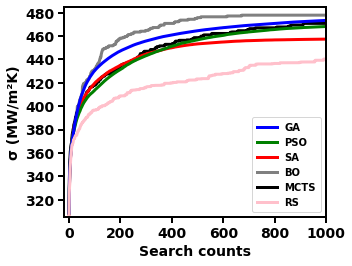

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3.8))
plt.plot(BOITC_limitvalue_mean_list, label='BO', color='grey', linewidth=3)
plt.plot(MCTSITC_limitvalue_mean_list, label='MCTS', color='black', linewidth=3)
plt.plot(SA_means, label='SA', color='red', linewidth=3)
plt.plot(PSO_means, label='PSO', color='green', linewidth=3)
plt.plot(GA_means, label='GA', color='blue', linewidth=3)
plt.plot(ROITC_limitvalue_mean_list, label='RS', color='pink', linewidth=3)
plt.xlabel('Search counts', fontsize=14, fontweight='bold')
plt.ylabel('σ (MW/m²K)', fontsize=14, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
order = [ 4, 3, 2, 0, 1, 5]
handles = [handles[i] for i in order]
labels = [labels[i] for i in order]
legend = plt.legend(handles, labels, loc='lower right', borderpad=0.5, prop={'weight':'bold'})

plt.xlim(-20, 1000)
plt.ylim(305, 485)

plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2, length=6)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.savefig('1_global.jpg', dpi=800)
plt.show()